In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.regressionplots import *
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import itertools
from sklearn.metrics import mean_squared_error


%matplotlib inline

# ridge regression
# prediction fork
# ridge regression not good for inference?
# we care about outliers
# still care about nonlinearity
# heteroskedacity / non normality errors == not good for prediction because they only make note for confidence intervals
# check piazza for tests to skip / tests to do 

In [15]:
#TODO: loading and preprocessing
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [16]:
df.size

134092

In [17]:
#rows
len(df)

9578

In [18]:
cols = df.columns.tolist()
cols

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [19]:
for col in cols:
    if df[col].isna().sum() > 0:
        print('NaN values found in column : ', col)
        #drop NA values
        df = df.dropna()
        #reset the index
        df = df[np.isfinite(california).all(1)].reset_index(drop="True")
    else:
        print('No NaN values found in column : ', col)
    
#TODO: Handle NA Values

No NaN values found in column :  credit.policy
No NaN values found in column :  purpose
No NaN values found in column :  int.rate
No NaN values found in column :  installment
No NaN values found in column :  log.annual.inc
No NaN values found in column :  dti
No NaN values found in column :  fico
No NaN values found in column :  days.with.cr.line
No NaN values found in column :  revol.bal
No NaN values found in column :  revol.util
No NaN values found in column :  inq.last.6mths
No NaN values found in column :  delinq.2yrs
No NaN values found in column :  pub.rec
No NaN values found in column :  not.fully.paid


In [10]:
# dtypes = dict(df.dtypes)
# print(dtypes)

# for col,dtype in dtypes.items():
#     if dtype == np.dtype('O'):
#         print('Handling object dtype column: \"{}" in design matrix with One Hot Encoding'.format(col))
#         # variable to represent the collection of one hot encoded columns
#         ohe = pd.get_dummies(df, drop_first=True)
#         df = df.drop(col,axis=1)
#         df = pd.concat([df,ohe],axis=1)

{'credit.policy': dtype('int64'), 'purpose': dtype('O'), 'int.rate': dtype('float64'), 'installment': dtype('float64'), 'log.annual.inc': dtype('float64'), 'dti': dtype('float64'), 'fico': dtype('int64'), 'days.with.cr.line': dtype('float64'), 'revol.bal': dtype('int64'), 'revol.util': dtype('float64'), 'inq.last.6mths': dtype('int64'), 'delinq.2yrs': dtype('int64'), 'pub.rec': dtype('int64'), 'not.fully.paid': dtype('int64')}
Handling object dtype column: "purpose" in design matrix with One Hot Encoding


In [12]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,0,1,0,0,1,0,0,0,0,0


In [21]:
y = df['int.rate']
X = df.drop('int.rate',axis=1)
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.05,random_state=42)
test_x.shape
test_y.shape

(479,)

In [23]:
len(test_y)

479

In [24]:
df1 = pd.concat([test_x,test_y],axis=1)
df1.columns

Index(['credit.policy', 'purpose', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'int.rate'],
      dtype='object')

In [25]:
df1.to_csv('loans_small.csv', index=False)

In [15]:
g = df['int.rate']
g= g.loc[:,~g.columns.duplicated()]
g

,int.rate
0,0.1189
1,0.1071
2,0.1357
3,0.1008
4,0.1426
...,...
9573,0.1461
9574,0.1253
9575,0.1071
9576,0.1600


In [16]:
df.columns
# so get_dummies has turned the categorical variable purpose into many one hot encoded vectors

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [17]:
#TODO: split this dataset into train and test
y = df['int.rate']
y = y.loc[:,~y.columns.duplicated()]
X = df.drop('int.rate',axis=1)


In [18]:
#TODO: figure out why there's two columns for int.rate
y

,int.rate
0,0.1189
1,0.1071
2,0.1357
3,0.1008
4,0.1426
...,...
9573,0.1461
9574,0.1253
9575,0.1071
9576,0.1600


In [19]:
X

,credit.policy,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,...,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,...,1,0,0,0,0,1,0,0,0,0
3,1,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,1,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,...,2,0,0,1,0,0,0,0,0,0
9574,0,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,...,5,0,0,1,0,0,0,0,0,0
9575,0,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,...,8,0,0,1,0,1,0,0,0,0
9576,0,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,...,5,0,0,1,0,0,0,1,0,0


In [20]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)

train_y

,int.rate
7317,0.1459
350,0.0838
5206,0.1148
2673,0.0932
3528,0.1126
...,...
5734,0.1357
5191,0.1426
5390,0.1426
860,0.1166


In [21]:
# lr = lm.LinearRegression()
# rfecv = RFECV(estimator = lr, step = 1, cv=StratifiedKFold(2), scoring='r2')
# selector = rfecv.fit(train_x, train_y)
# train_X_new = selector.transform(train_x)
# train_Y_new = selector.transform(train_y)


In [22]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = lm.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [23]:
#Initialization variables
from tqdm import tnrange, tqdm_notebook

Y = y
X = X
k = len(X.columns.tolist())
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,6,desc="Looping . ,"):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

/Users/chrislouie/anaconda3/envs/strally/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  # This is added back by InteractiveShellApp.init_path()


Looping . ,:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

print(x_train.size)
print(x_test.size)
print(y_train.size)
print(y_test.size)

258600
28740
8620
958


In [29]:
type(x_test)

pandas.core.frame.DataFrame

In [39]:
output = pd.concat([x_test,y_test],axis=1)
output = output.sort_index(axis=0)
output = output.sort_index(axis=1)

output.to_csv('loans_small.csv',index=False)

In [40]:
_df = pd.read_csv('loans_small.csv')
_df.head()

,credit.policy,credit.policy.1,days.with.cr.line,days.with.cr.line.1,delinq.2yrs,delinq.2yrs.1,dti,dti.1,fico,fico.1,...,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,revol.bal,revol.bal.1,revol.util,revol.util.1
0,1,1,5639.958333,5639.958333,0,0,19.48,19.48,737,737,...,0,1,0,0,0,0,28854,28854,52.1,52.1
1,1,1,2699.958333,2699.958333,0,0,8.10,8.10,712,712,...,0,1,0,0,0,0,33667,33667,73.2,73.2
2,1,1,6713.041667,6713.041667,0,0,22.09,22.09,677,677,...,0,1,0,0,0,0,13846,13846,71.0,71.0
3,1,1,1559.958333,1559.958333,0,0,9.73,9.73,727,727,...,0,1,0,0,0,0,6282,6282,44.6,44.6
4,1,1,1126.958333,1126.958333,0,0,2.74,2.74,667,667,...,0,0,0,0,1,0,591,591,84.4,84.4


In [70]:
#TODO: write a script or set of functions that handles all the NA values of this dataset
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(x_train.size)
print(x_test.size)
print(y_train.size)
print(y_test.size)

229860
57480
7662
1916


In [71]:
y_train

,int.rate
7317,0.1459
350,0.0838
5206,0.1148
2673,0.0932
3528,0.1126
...,...
5734,0.1357
5191,0.1426
5390,0.1426
860,0.1166


In [73]:
#TODO: make the linear regression model before looking for outliers

#note: this step just shows that we can create an OLS model from a traintestsplit from the original dataset

#TODO: do crossvalidation for model selection


def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}


def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model





In [43]:
model_1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:               int.rate   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     935.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:30:56   Log-Likelihood:                 23628.
No. Observations:                8620   AIC:                        -4.722e+04
Df Residuals:                    8601   BIC:                        -4.708e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [81]:
# list of attributes https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

In [44]:
#TODO: write functions to remove outliers with high leverage and influential points
#STRETCH: include print statements that determine why these outliers were removed

model_1.resid

8457   -0.005414
1076   -0.017463
3429    0.017462
5533    0.007913
408    -0.017604
          ...   
5734    0.004633
5191   -0.007175
5390   -0.002727
860    -0.015968
7270    0.001796
Length: 8620, dtype: float64

In [45]:
model_1.fittedvalues

8457    0.153614
1076    0.115063
3429    0.120438
5533    0.138187
408     0.119004
          ...   
5734    0.131067
5191    0.149775
5390    0.145327
860     0.132568
7270    0.136704
Length: 8620, dtype: float64

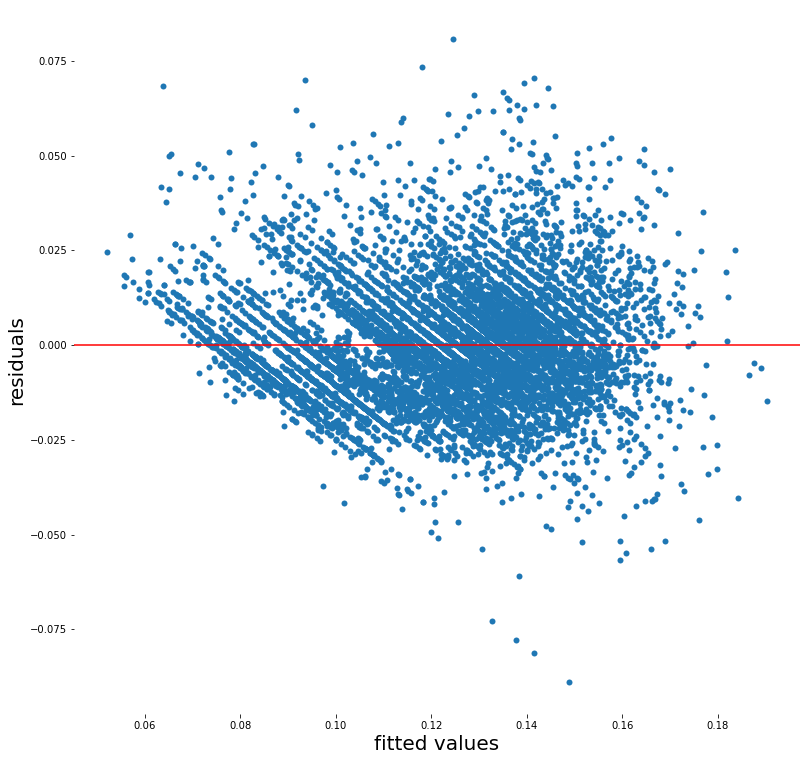

In [47]:
f, ax = plt.subplots(figsize=(13, 13))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x=model_1.fittedvalues, y=model_1.resid,
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0, ax=ax)
plt.axhline(y=0,color='red')
plt.xlabel("fitted values", fontsize=20)
plt.ylabel("residuals",fontsize=20)
plt.show()

In [105]:
#TODO: write function to discover points of high leverage & outliers

In [13]:
#TODO: write basic plots to show the remove outliers with regards to the plots mentioned on 11/17 notes

In [ ]:
#TODO: write function to determine which tests to do based on what the user specifies???
